# <font color=#025dfa> Derin Öğrenim Classification Zehirli Mantarların İkili Tahmini - Deep Learning Classification Binary Prediction of Poisonous Mushrooms

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, mantarların saklanıp saklanmadığının belirlenmesi amacıyla derin öğrenme temelli bir ikili büyüme modeli geliştirmeyi hedeflemektedir. Mantarların şekli, rengi, yüzey özellikleri gibi çeşitli biyolojik ve fiziksel özellikler kullanılarak, saklanan ve zehirsiz mantarların sınıflandırılması gerçekleştirilecektir. Projenin amacı, mantar toplama ve tüketiminde güvenlik artışı ve biyolojik çeşitlilik araştırmalarında sunulan pratik ve güvenilir bir çıkış aracı sunmaktır.

EN = This project aims to develop a deep learning based binary growth model to determine whether mushrooms are stored or not. Classification of stored and non-poisonous mushrooms will be carried out using various biological and physical features such as shape, color, and surface properties of mushrooms. The aim of the project is to provide a practical and reliable exit tool for increased safety in mushroom collection and consumption and biodiversity research.

Kaynak/Source = https://www.kaggle.com/competitions/playground-series-s4e8/overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import nltk
import warnings
warnings.filterwarnings('ignore')
import re
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [3]:
df=pd.read_csv('train.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis 

In [4]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
df.sample(5)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
139393,139393,e,4.03,x,NaN,w,f,d,NaN,r,5.96,7.22,NaN,NaN,l,NaN,NaN,f,f,NaN,d,u
1847112,1847112,p,3.49,f,y,e,f,e,c,w,4.94,3.44,NaN,k,w,NaN,NaN,t,e,NaN,m,u
1421266,1421266,p,8.54,x,y,y,f,a,c,n,12.33,11.90,NaN,y,y,NaN,NaN,t,NaN,NaN,d,u
1196620,1196620,p,6.18,b,d,n,f,d,c,y,5.49,6.63,NaN,i,n,NaN,NaN,t,NaN,NaN,d,u
72468,72468,p,4.43,x,h,y,f,a,c,y,6.12,6.80,NaN,g,o,NaN,NaN,f,f,NaN,g,a


In [6]:
df.tail()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,NaN,y,w,NaN,NaN,t,p,NaN,d,u
3116944,3116944,p,3.20,x,s,g,f,d,c,w,2.82,7.79,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u


In [7]:
df.shape

(3116945, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [9]:
df.isnull().sum().sort_values(ascending=False)

veil-type               2957493
spore-print-color       2849682
stem-root               2757023
veil-color              2740947
stem-surface            1980861
gill-spacing            1258435
cap-surface              671023
gill-attachment          523936
ring-type                128880
gill-color                   57
habitat                      45
cap-shape                    40
stem-color                   38
has-ring                     24
cap-color                    12
does-bruise-or-bleed          8
cap-diameter                  4
id                            0
stem-width                    0
class                         0
stem-height                   0
season                        0
dtype: int64

In [10]:
df.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [11]:
df.corr(numeric_only=True)

,id,cap-diameter,stem-height,stem-width
id,1.000000,0.000291,0.000124,0.000396
cap-diameter,0.000291,1.000000,0.364063,0.746316
stem-height,0.000124,0.364063,1.000000,0.356225
stem-width,0.000396,0.746316,0.356225,1.000000


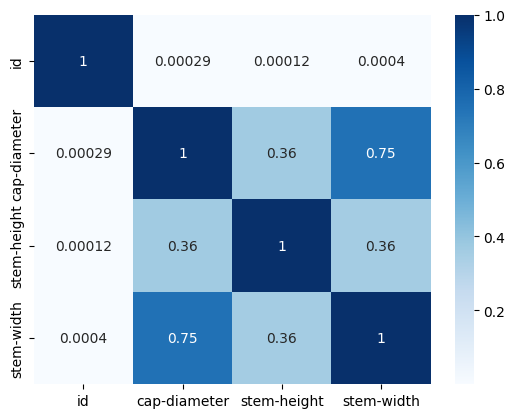

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [13]:
#abs(df.corr(numeric_only=True)['Class']).sort_values(ascending=False)

## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [14]:
df=df.drop('id',axis=1)
df.head(1)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.8,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a


## <font color='#8b1cc7'> Sütün İşimlerini Orjinal, Türkçe Ve İngilizce Versiyonda Göster  - Show the Processes of Milk in Original, Turkish and English Version

## <font color=#1cfc03> Aykırı Değer - Outlier

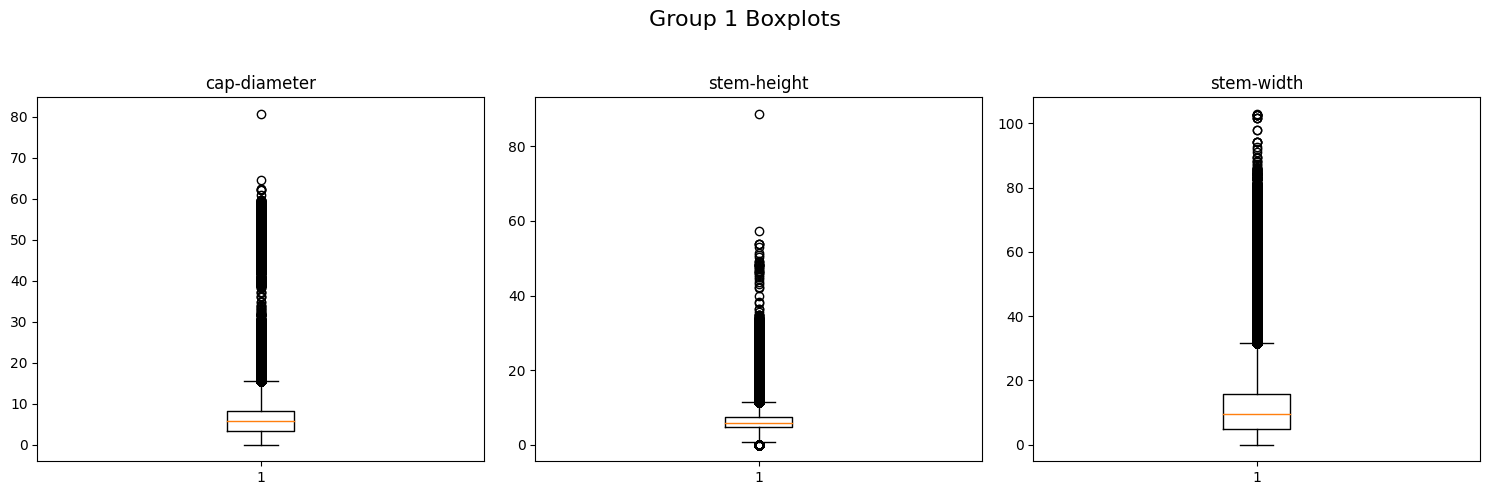

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  
# TR = Veri setindeki tüm sayısal sütunları seçer  
# EN = Selects all numeric columns in the dataset

num_cols = len(numeric_cols)  
# TR = Sayısal sütunların toplam sayısını hesaplar  
# EN = Calculates the total number of numeric columns

num_plots_per_group = 9  
# TR = Her grup için 9 grafik olacağını belirtir  
# EN = Specifies that each group will contain 9 plots

num_groups = math.ceil(num_cols / num_plots_per_group)  
# TR = Toplam grafikleri 9'luk gruplar halinde kaç grup gerektiğini hesaplar  
# EN = Calculates how many groups of 9 plots are needed for the total columns

for group in range(num_groups):  
    # TR = Her grup için döngü başlatır  
    # EN = Starts a loop for each group

    cols_in_group = numeric_cols[group * num_plots_per_group:(group + 1) * num_plots_per_group]  
    # TR = Her grup için 9 sütun seçer  
    # EN = Selects 9 columns for each group

    num_plots = len(cols_in_group)  
    # TR = Bu gruptaki toplam grafik sayısını hesaplar  
    # EN = Calculates the total number of plots in the group

    rows = math.ceil(num_plots / 3)  
    # TR = Her grafiğin 3 sütun olacak şekilde kaç satırda yer alacağını belirler  
    # EN = Determines how many rows are needed for 3 columns of plots

    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))  
    # TR = Grafik alt pencereleri (subplots) oluşturur  
    # EN = Creates the subplots for the group

    axs = axs.flatten() if num_plots > 1 else [axs]  
    # TR = Grafik pencerelerini düzleştirir (eğer tek değilse)  
    # EN = Flattens the plot axes (if there’s more than one)

    for i, col in enumerate(cols_in_group):  
        # TR = Her sütun için döngü başlatır  
        # EN = Loops through each column in the group

        axs[i].boxplot(df[col].dropna())  
        # TR = Veri setindeki ilgili sütunun aykırı değerlerini gösteren kutu grafiği oluşturur  
        # EN = Creates a boxplot for the column to show outliers

        axs[i].set_title(col)  
        # TR = Her grafiğe başlık ekler  
        # EN = Adds a title to each plot

    for i in range(num_plots, len(axs)):  
        # TR = Eğer tüm grafikler kullanılmadıysa, fazla olanları gizler  
        # EN = Hides any unused axes if there are fewer plots than subplots

        axs[i].set_visible(False)  

    plt.suptitle(f'Group {group + 1} Boxplots', fontsize=16)  
    # TR = Grup başlığı ekler  
    # EN = Adds a title for the group of boxplots

    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    # TR = Grafiklerin düzenli görünmesini sağlar  
    # EN = Ensures the layout is clean and well-organized

In [16]:
#numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  
# TR = Veri setindeki sayısal sütunları (float64 ve int64 türündeki sütunları) seçer  
# EN = Selects numeric columns from the dataset (float64 and int64 types)

#for col in numeric_cols:  
    # TR = Her bir sayısal sütun için döngü başlatır  
    # EN = Loops through each numeric column

   # percentile_94 = df[col].quantile(0.94)  
    # TR = Sütundaki 94. yüzdelik dilim değerini hesaplar  
    # EN = Calculates the 94th percentile value for the column

   # outlier_count = (df[col] > percentile_94).sum()  
    # TR = 94. yüzdelik dilimden büyük olan değerlerin sayısını bulur  
    # EN = Counts how many values are greater than the 94th percentile

   # total_rows = len(df)  
    # TR = Veri setindeki toplam satır sayısını alır  
    # EN = Gets the total number of rows in the dataset

   # if outlier_count < total_rows:  
        # TR = Eğer aykırı değer sayısı toplam satır sayısından azsa  
        # EN = If the outlier count is less than the total number of rows

       # df = df[df[col] <= percentile_94]  
        # TR = 94. yüzdelik dilimden küçük veya eşit olan değerleri tutarak veri setini filtreler  
        # EN = Filters the dataset to keep only values less than or equal to the 94th percentile

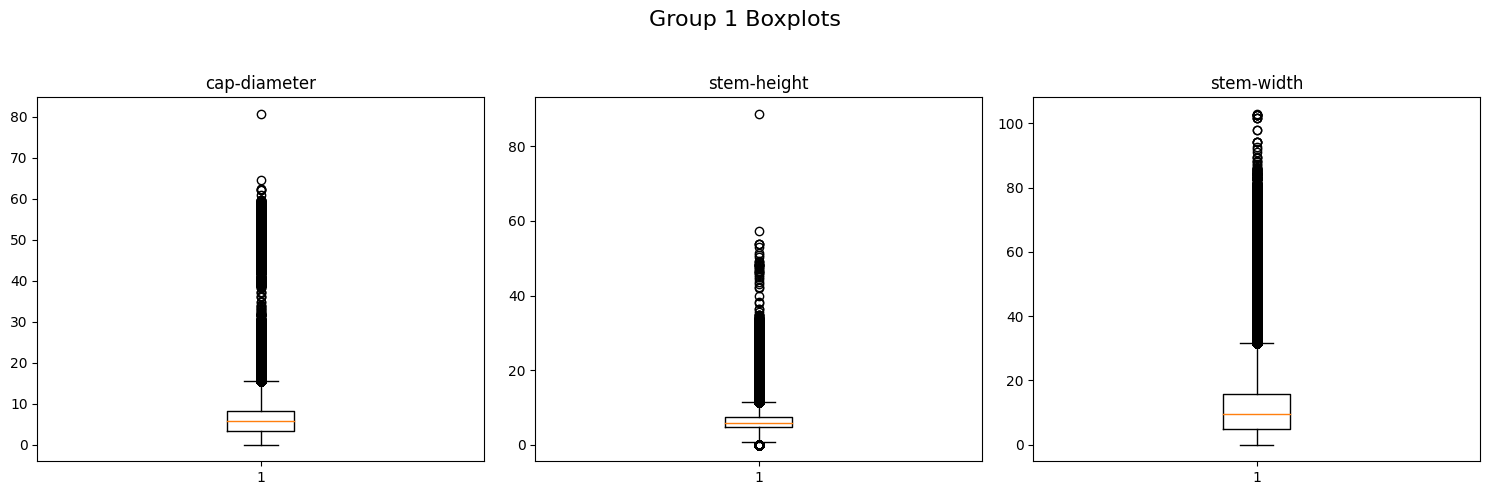

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numeric_cols)
num_plots_per_group = 9
num_groups = math.ceil(num_cols / num_plots_per_group)

for group in range(num_groups):
    cols_in_group = numeric_cols[group * num_plots_per_group:(group + 1) * num_plots_per_group]
    num_plots = len(cols_in_group)
    rows = math.ceil(num_plots / 3)
    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axs = axs.flatten() if num_plots > 1 else [axs]

    for i, col in enumerate(cols_in_group):
        axs[i].boxplot(df[col].dropna())
        axs[i].set_title(col)

    for i in range(num_plots, len(axs)):
        axs[i].set_visible(False)  

    plt.suptitle(f'Group {group + 1} Boxplots', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

## <font color='#ff4d00'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzeltmeye Başladık - If there is a gap, we started to fill it and if there is a part to be corrected, we started to correct it.

In [18]:
#for column in df.columns:
    # TR = Verideki her bir sütun için döngü başlatılıyor  
    # EN = Loops through each column in the dataframe

#    print(f"\nSütun: {column}")  
    # TR = Sütun ismi ekrana yazdırılıyor  
    # EN = Prints the column name

#    unique = df[column].dropna().unique()  
    # TR = NaN değerleri düşürerek benzersiz değerler elde ediliyor  
    # EN = Gets the unique values after dropping NaN values

#    if pd.api.types.is_numeric_dtype(df[column]):  
        # TR = Eğer sütundaki değerler sayısal ise, değerler sıralanıyor  
        # EN = If the column is of numeric type, the unique values are sorted
#        unique = sorted(unique)
        
#    nunique = len(unique)  # Benzersiz değerlerin sayısını hesapla
    # TR = Benzersiz değerlerin sayısını hesaplar  
    # EN = Calculates the number of unique values

#    print(f"Nunique Değerler: {nunique}")  
    # TR = Benzersiz değerlerin sayısını ekrana yazdırır  
    # EN = Prints the number of unique values

#    print(f"Unique Değerler: {unique}")  
    # TR = Benzersiz değerler ekrana yazdırılıyor  
    # EN = Prints the unique values


In [19]:
df.isnull().sum().sort_values(ascending=False)

veil-type               2957493
spore-print-color       2849682
stem-root               2757023
veil-color              2740947
stem-surface            1980861
gill-spacing            1258435
cap-surface              671023
gill-attachment          523936
ring-type                128880
gill-color                   57
habitat                      45
cap-shape                    40
stem-color                   38
has-ring                     24
cap-color                    12
does-bruise-or-bleed          8
cap-diameter                  4
class                         0
stem-width                    0
stem-height                   0
season                        0
dtype: int64

### <font color=#ff2400> cap-diameter Sütuna Bakıyoruz - We Look at the Column cap-diameter

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

lr = LinearRegression()  
# TR = LinearRegression sınıfından bir regresyon modeli oluşturur  
# EN = Creates a regression model from the LinearRegression class

imp = IterativeImputer(estimator=lr)  
# TR = Eksik verileri doldurmak için LinearRegression modelini kullanan IterativeImputer oluşturur  
# EN = Creates an IterativeImputer using the LinearRegression model to handle missing data

numeric_df = df[numeric_cols]

df[numeric_cols] = imp.fit_transform(numeric_df)
# TR = Eksik verileri doldurmak için IterativeImputer'ı uygular ve sonucu df veri çerçevesine atar  
# EN = Applies the IterativeImputer to fill missing data and assigns the result back to the df dataframe

### <font color=#ff2400> Object Türündeki Sütunlara Bakıyoruz - Looking at Object Type Columns

In [21]:
object_columns = df.select_dtypes(include=['object']).columns
# TR = Nesne türündeki (string) sütunları seçer  
# EN = Selects columns with object (string) data type

for column in object_columns:
    df[column] = df[column].apply(lambda x: x if isinstance(x, str) and len(x) == 1 and not x.replace('.', '', 1).isdigit() else None)
    # TR = Her bir sütundaki değerleri kontrol eder ve sadece tek karakterli, rakam olmayan değerleri bırakır, diğerlerini None ile değiştirir  
    # EN = Checks each column's values and retains only single-character, non-numeric values, replacing others with None
    
    none_indices = df[df[column].isna()].index
    
    non_none_values = df[column].dropna().unique()
    
    if len(non_none_values) > 0:
        np.random.seed(0)
        random_values = np.random.choice(non_none_values, size=len(none_indices))
        df.loc[none_indices, column] = random_values

In [22]:
df.isnull().sum().sort_values(ascending=False)

class                   0
stem-root               0
habitat                 0
spore-print-color       0
ring-type               0
has-ring                0
veil-color              0
veil-type               0
stem-color              0
stem-surface            0
stem-width              0
cap-diameter            0
stem-height             0
gill-color              0
gill-spacing            0
gill-attachment         0
does-bruise-or-bleed    0
cap-color               0
cap-surface             0
cap-shape               0
season                  0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 499.4+ MB


## <font color=#e0c510> Verileri Görşelleştirme - Visualizing Data me

In [24]:
#for column in df.columns:
    # TR = Verideki her bir sütun için döngü başlatılıyor  
    # EN = Loops through each column in the dataframe

#    print(f"\nSütun: {column}")  
    # TR = Sütun ismi ekrana yazdırılıyor  
    # EN = Prints the column name

#    unique = df[column].dropna().unique()  
    # TR = NaN değerleri düşürerek benzersiz değerler elde ediliyor  
    # EN = Gets the unique values after dropping NaN values

#    if pd.api.types.is_numeric_dtype(df[column]):  
        # TR = Eğer sütundaki değerler sayısal ise, değerler sıralanıyor  
        # EN = If the column is of numeric type, the unique values are sorted
#        unique = sorted(unique)
        
#    nunique = len(unique)  # Benzersiz değerlerin sayısını hesapla
    # TR = Benzersiz değerlerin sayısını hesaplar  
    # EN = Calculates the number of unique values

#    print(f"Nunique Değerler: {nunique}")  
    # TR = Benzersiz değerlerin sayısını ekrana yazdırır  
    # EN = Prints the number of unique values

#    print(f"Unique Değerler: {unique}")  
    # TR = Benzersiz değerler ekrana yazdırılıyor  
    # EN = Prints the unique values


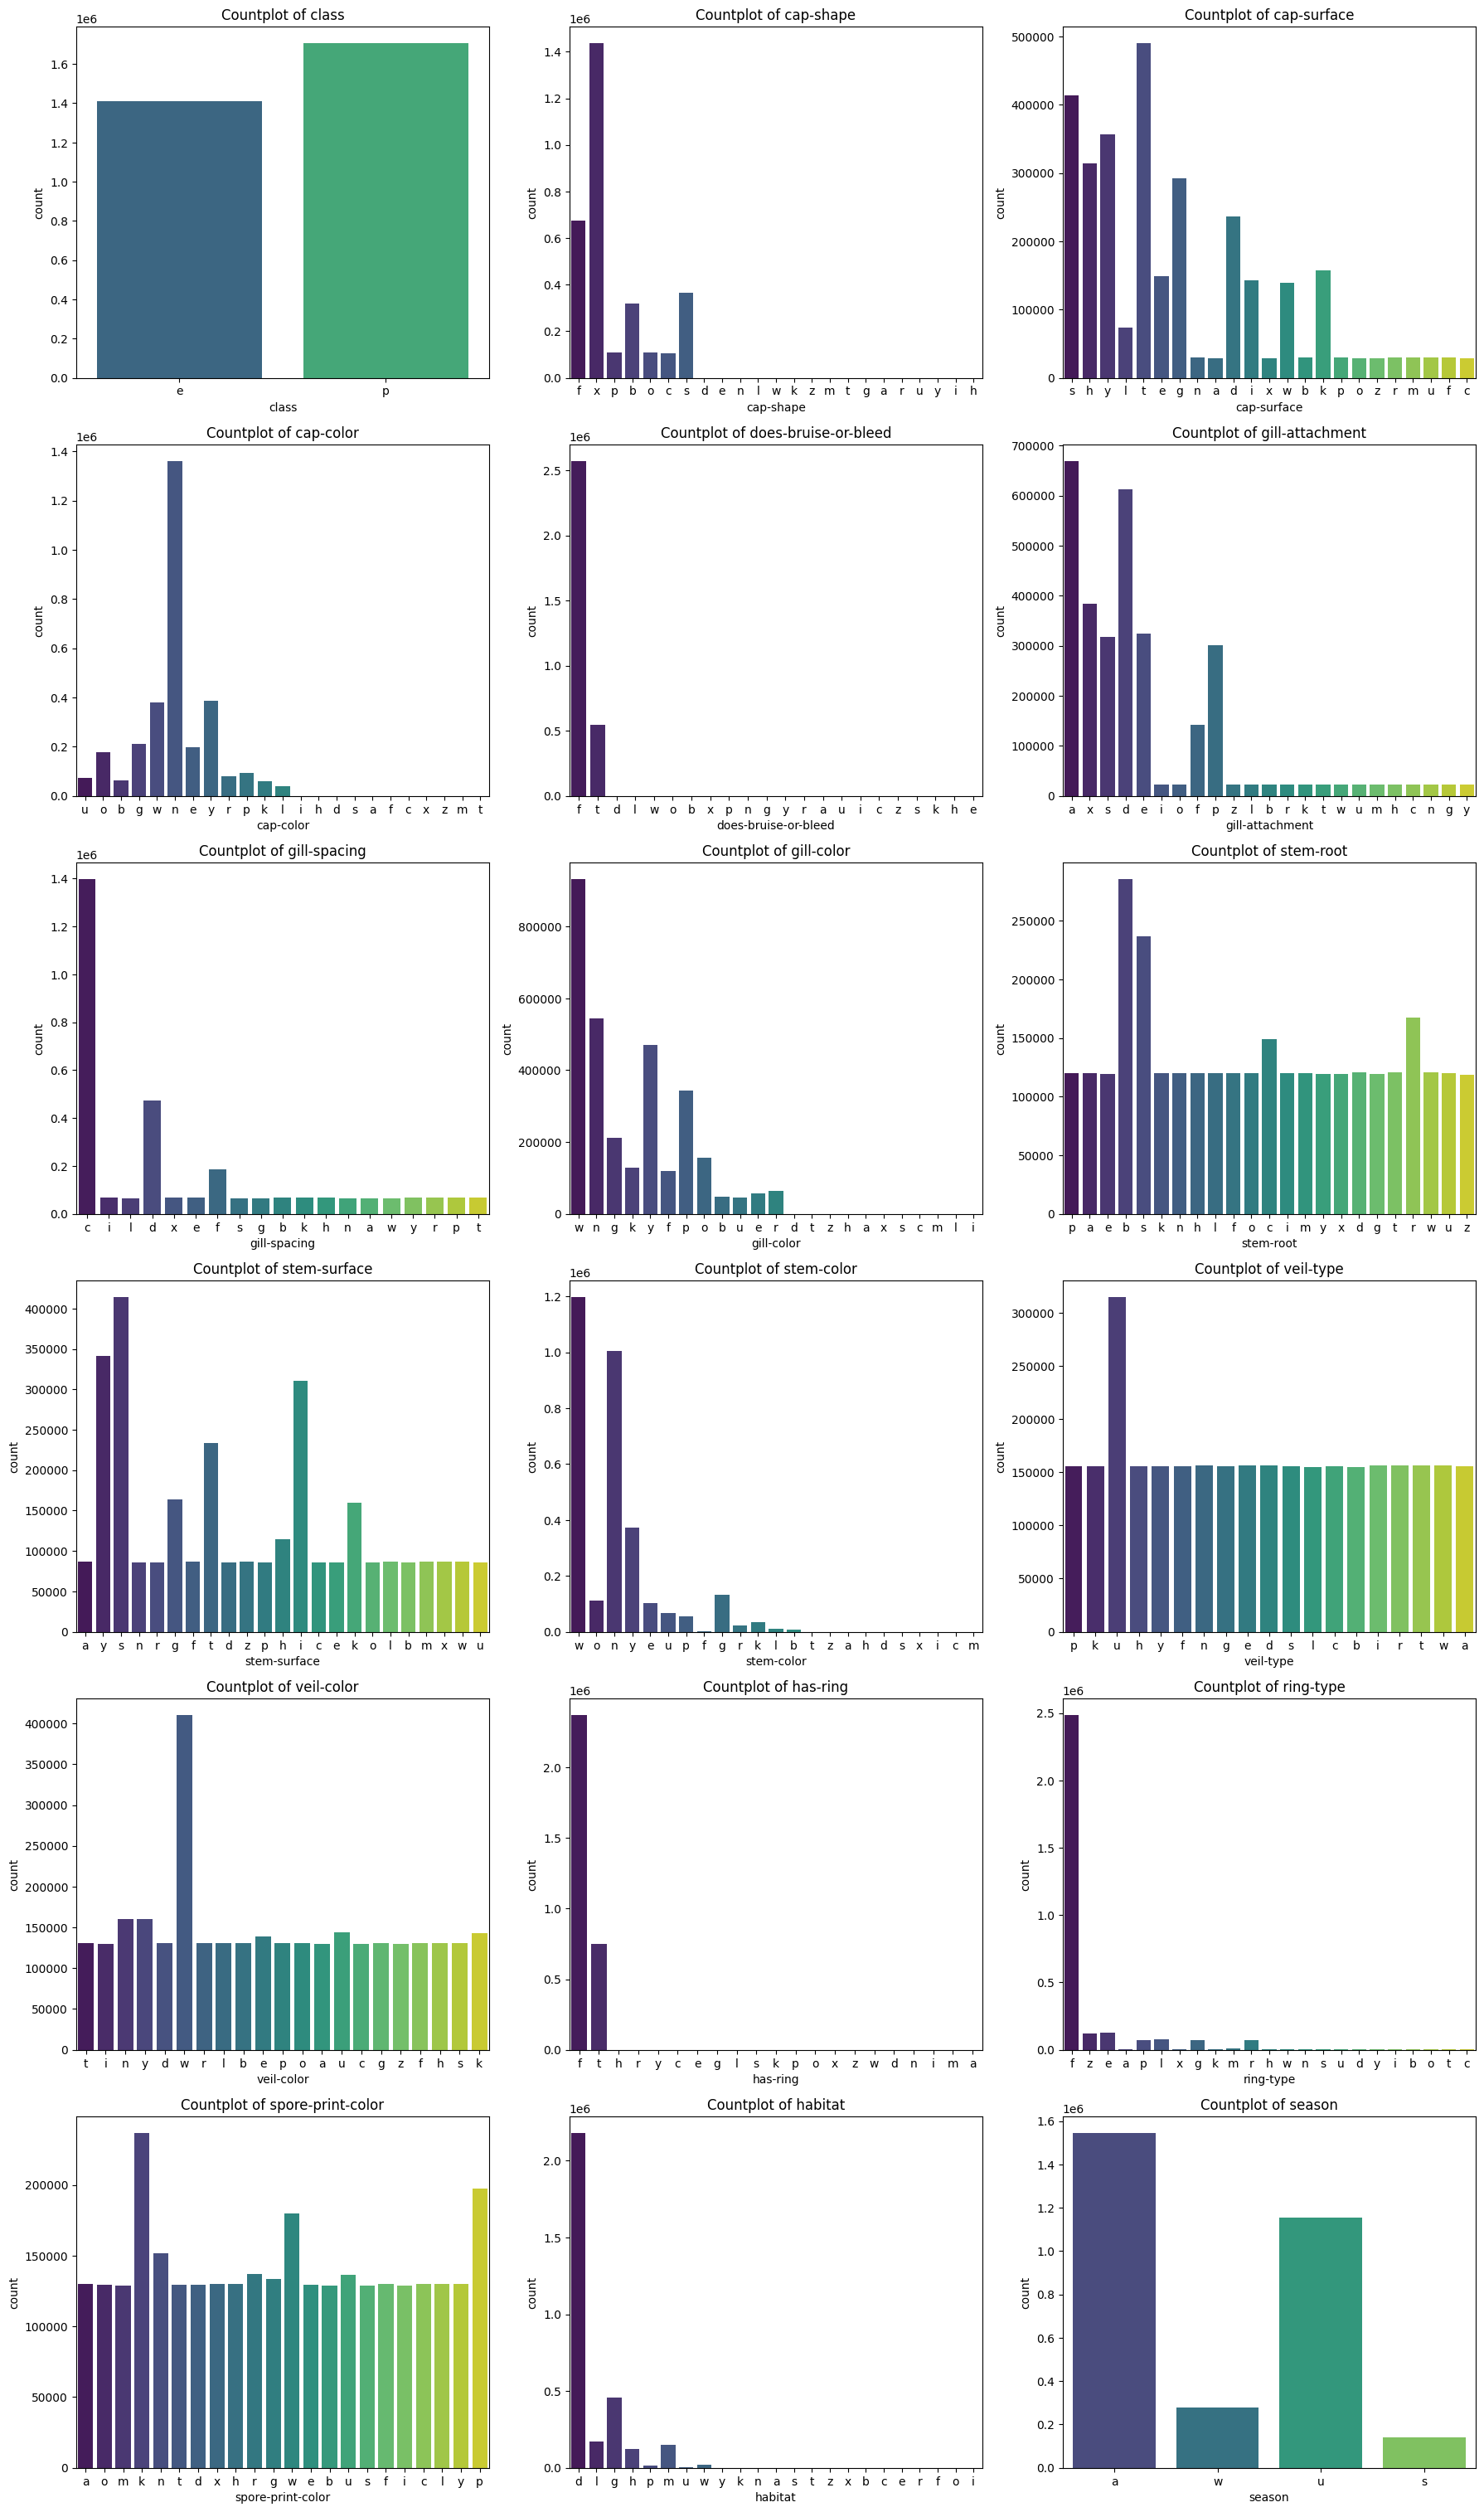

In [25]:
excluded_columns = df.select_dtypes(include=['int64', 'float64']).columns  
# TR = excluded_columns'ma eşitlenmiş sütunları görselleştirmeden hariç tutuyoruz.
# EN = We exclude columns equal to excluded_columns from the visualization.

columns = [col for col in df.columns if col not in excluded_columns]
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col not in excluded_columns) excluded_columns değişkeninin içindeki sütun adlarına bakma.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col not in excluded_columns) Look at the column names in the excluded_columns variable.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.countplot(data=df, x=column, ax=axes[row, col], palette="viridis")
    # TR = Kategorik verilerin her bir sınıfındaki gözlem sayısını görselleştirmek için kullanılır ve her kategorinin frekansını çubuklarla gösterir.
    # EN = It is used to visualize the number of observations in each class of categorical data and shows the frequency of each category with bars.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler

    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.



    axes[row, col].set_title(f'Countplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column


for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

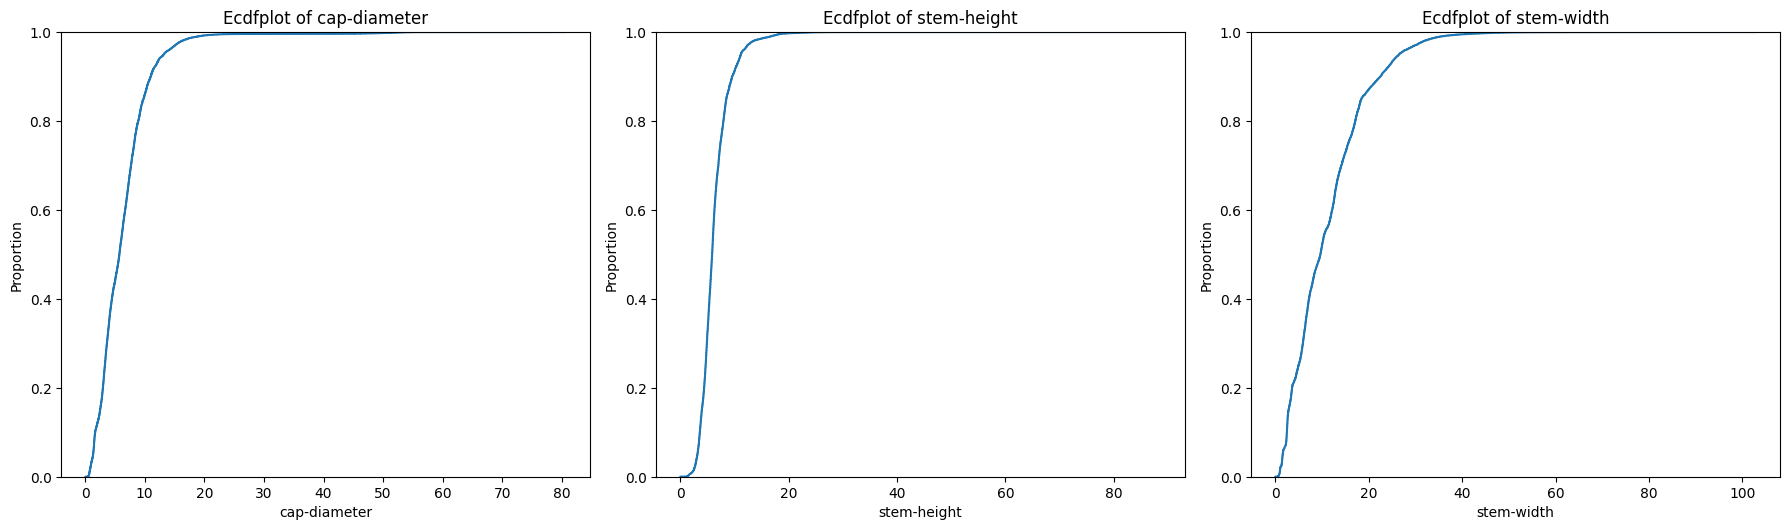

In [26]:
excluded_columns = df.select_dtypes(include=['int64', 'object']).columns  
# TR = excluded_columns'ma eşitlenmiş sütunları görselleştirmeden hariç tutuyoruz.
# EN = We exclude columns equal to excluded_columns from the visualization.

columns = [col for col in df.columns if col not in excluded_columns]
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col not in excluded_columns) excluded_columns değişkeninin içindeki sütun adlarına bakma.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col not in excluded_columns) Look at the column names in the excluded_columns variable.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.ecdfplot(data=df, x=column, ax=axes[row, col])
    # TR = Belirli bir değişkenin kümülatif dağılımını görmek için kullanılır. Bu grafikle değişkenlerin dağılımını analiz edebilirsiniz.
    # EN = It is used to see the cumulative distribution of a particular variable. With this graph you can analyze the distribution of variables.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler

    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.




    axes[row, col].set_title(f'Ecdfplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column


for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling 

In [27]:
x=df.drop('class',axis=1)
y=df[['class']]

In [28]:
x=pd.get_dummies(x,drop_first=True) 
y=pd.get_dummies(y,drop_first=True)
# Tr =  kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi için kullanılır. 
# En = It is used to convert categorical variables into numerical variables.

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik. 
# EN = We trained our model.

In [30]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

MemoryError: Unable to allocate 419. MiB for an array with shape (22, 2493556) and data type float64

In [ ]:
scaler = MinMaxScaler()
# TR = Girdilerin belirli bir aralıkta olması performansı artırır. Bu nedenle MinMaxScaler ile verileri 0 ile 1 arasında normalize ediyoruz.
# EN = Having inputs within a certain range improves performance. Therefore, we normalize the data between 0 and 1 with MinMaxScaler.

x_train = scaler.fit_transform(x_train)
# TR = Verileri ölçekleyerek, modelin daha hızlı ve etkili öğrenmesini sağlamak için tüm özellikleri aynı aralığa getiriyoruz.
# EN = By scaling the data, we bring all the features into the same range to allow the model to learn faster and more effectively.

x_test = scaler.transform(x_test)
# TR = Test verilerini eğitimde kullanılan aynı ölçekle dönüştürerek modelin test verileri üzerinde doğru tahminler yapmasını sağlar.
# EN = It enables the model to make accurate predictions on the test data by transforming the test data to the same scale used in training.

In [ ]:
model=Sequential()
model.add(Dense(256,activation='relu'))
# TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 256 nöron var.
# TR = Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.
# EN = This layer connects all input neurons and learns the weights of each neuron. There are 256 neurons.
# EN = Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

model.add(BatchNormalization())
# TR = Bu katman, modelin eğitim sürecini daha stabil hale getirmek için kullanılır.
# EN = This layer is used to make the training process of the model more stable.

model.add(Dropout(0.3))
# TR = Derin öğrenme modelinde aşırı uyumu (overfitting) azaltmak için kullanılır. Genelde 0.2 ile 0.5 arasında olur.
# EN = It is used to reduce overfitting in the deep learning model. It is generally between 0.2 and 0.5.

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))


#model.add(Flatten())
# TR = Derin öğrenme modelindeki çok boyutlu (2D, 3D vb.) verileri tek boyutlu bir vektöre dönüştürür.
# EN = It converts multidimensional (2D, 3D, etc.) data in the deep learning model into a one-dimensional vector.

model.add(Dense(1, activation='sigmoid'))
# TR = Sigmoid fonksiyonu, çıktı değerini 0 ile 1 arasında sınırlayarak iki sınıflı (binary) sınıflandırma problemleri için kullanılır.
# EN = The sigmoid function is used for binary classification problems, limiting the output value between 0 and 1.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# TR = EarlyStopping ekleyin: Eğitim sırasında model performansı iyileşmediğinde erken durması için kullanıyoruz.
# EN = Add EarlyStopping: We use it to stop early when model performance does not improve during training.

# TR = val_loss 10 epoch boyunca iyileşmezse eğitimi durduruyor ve en iyi ağırlıkları geri yüklüyor.
# EN = If val_loss does not improve for 10 epochs, it stops training and restores the best weights.

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# TR = İkili sınıflandırma (çıktı katmanı sigmoid aktivasyon kullanır).
# TR = Tahmin edilen olasılık ile gerçek ikili etiketler arasındaki farkı ölçer.
# TR = optimizer='adam': Adam (Adaptive Moment Estimation) optimizasyon algoritması, modelin ağırlıklarını güncellerken kullanılan bir yöntemdir.
# TR = metrics=['accuracy']: Modelin performansını değerlendirmek için kullanılan bir ölçümdür. Doğru sınıflandırılan örneklerin toplam örneklere oranını hesaplar.

# EN = Binary classification (output layer uses a sigmoid activation).
# EN = Measures the difference between the predicted probability and the actual binary labels.
# EN = optimizer='adam': Adam (Adaptive Moment Estimation) optimization algorithm is a method used when updating the weights of the model.
# EN = metrics=['accuracy']: A metric used to evaluate the performance of the model. It calculates the ratio of correctly classified examples to total examples.

history=model.fit(x, y, validation_split=0.2, batch_size=128, epochs=100, callbacks=[early_stopping],verbose=1)
# TR = Modeli 100 epoch boyunca eğitiyoruz, fakat EarlyStopping ile durdurulabilir. Batch boyutu 128 olarak belirlenmiş.
# EN = We train the model for 100 epochs, but it can be stopped with EarlyStopping. Batch size is set to 128.

In [ ]:
model.summary()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

In [ ]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

In [ ]:
#pred

In [ ]:
threshold = 0.5
pred = (pred > threshold).astype(float)
y_test =(y_test> threshold).astype(float)

In [ ]:
y_test

In [ ]:
accuracy_score(y_test, pred)
# TR = accuracy_score fonksiyonu ile y_test, pred kullanarak sonucumuzu bulduk.
# EN = We found our result using the accuracy_score function and y_test, pred.

In [ ]:
confusion_matrix(y_test, pred)
# TR = confusion_matrix fonksiyonu ile y_test, pred kullanarak ne kadarını yanlış tahmin ettiğimizi buluyoruz
# EN = Using the confusion_matrix function and y_test, pred, we find out how much we guessed wrong.

# TR = 4 sayı değeri veriyor bize. Sol üst ve sağ alt doğru tahmin, sağ üst ve sol alt yanlış tahmin. 
# EN = It gives us 4 number values. Upper left and lower right are correct guesses, upper right and lower left are incorrect guesses.

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True);
# TR = Yukarıdakinin görsel versiyonu.
# EN = Visual version of the above.

In [ ]:
print(classification_report(y_test, pred))
# TR = print içinde yazdık yoksa sayıların sıralanması bozuluyor.
# EN = We wrote it in print, otherwise the order of the numbers will be disrupted.

# TR = classification_report ile y_test, pred kullanarak precision, recall, f1-score ve support ulaştık.
# EN = We achieved precision, recall, f1-score and support using classification_report and y_test, pred.

# TR = Precision (Kesinlik): Doğru olarak pozitif tahmin edilen örneklerin, toplam pozitif tahmin edilen örnekler içindeki oranını gösterir. Yani, modelin pozitif sınıfı ne kadar doğru tahmin ettiğini ölçer.
# EN = Precision (Precision): It shows the ratio of correctly predicted positive samples among the total positive predicted samples. That is, it measures how accurately the model predicts the positive class.

# TR = Recall (Duyarlılık): Gerçek pozitif örneklerin, toplam pozitif örnekler içindeki oranını gösterir. Modelin pozitif sınıfı ne kadar iyi bulduğunu ölçer.
# EN = Recall (Sensitivity): Shows the ratio of true positive samples in total positive samples. It measures how well the model finds the positive class.

# TR = F1-score: Precision ve recall'un harmonik ortalamasıdır. Hem precision hem de recall'u dikkate alarak modelin genel performansını özetler.
# EN = F1-score: It is the harmonic mean of precision and recall. It summarizes the overall performance of the model, taking into account both precision and recall.

# TR = Support: Her sınıftan kaç örneğin bulunduğunu gösterir. Yani, gerçek etiketlerde her bir sınıfa ait kaç örnek olduğunu ifade eder.
# EN = Support: Shows how many examples of each class are available. That is, it expresses how many examples of each class there are in the real labels.

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [ ]:
pickle.dump(model,open('Mantar.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))